In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv("Global EV Data.csv")

In [27]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
2771,World,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,4.300000e-01
2772,World,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",2.500000e+04
2773,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7.300000e+06
2774,World,Historical,EV sales share,Cars,EV,2022,percent,1.400000e+01


In [50]:
df.isnull()

,region,category,parameter,mode,powertrain,year,unit,value
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2771,False,False,False,False,False,False,False,False
2772,False,False,False,False,False,False,False,False
2773,False,False,False,False,False,False,False,False
2774,False,False,False,False,False,False,False,False


In [51]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2771    False
2772    False
2773    False
2774    False
2775    False
Length: 2776, dtype: bool

In [28]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [29]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
2771,World,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.43
2772,World,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",25000.00
2773,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000.00
2774,World,Historical,EV sales share,Cars,EV,2022,percent,14.00
2775,World,Historical,EV stock share,Cars,EV,2022,percent,2.10


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2776 non-null   object 
 1   category    2776 non-null   object 
 2   parameter   2776 non-null   object 
 3   mode        2776 non-null   object 
 4   powertrain  2776 non-null   object 
 5   year        2776 non-null   int64  
 6   unit        2776 non-null   object 
 7   value       2776 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 173.6+ KB


In [31]:
df.describe()

,year,value
count,2776.000000,2.776000e+03
mean,2016.438401,9.015623e+04
std,3.583217,6.186595e+05
min,2010.000000,1.600000e-05
25%,2013.000000,9.100000e-01
50%,2017.000000,4.000000e+02
75%,2020.000000,1.000000e+04
max,2022.000000,1.800000e+07


In [32]:
world_mean = df[df['region'] == 'World']['value'].mean()
world_mean

851191.3577866605

In [33]:
world_std = df[df['region'] == 'World']['value'].std()
world_std

2378811.5628658533

In [34]:
world_sales_2019_2020 = df[(df['region'] == 'World') & (df['year'] >= 2019) & (df['year'] <= 2020)]
world_sales_2019_2020

,region,category,parameter,mode,powertrain,year,unit,value
2740,World,Historical,EV sales,Cars,BEV,2019,Vehicles,1500000.00
2741,World,Historical,Oil displacement Mbd,Cars,EV,2019,Milion barrels per day,0.11
2742,World,Historical,"Oil displacement, million lge",Cars,EV,2019,"Oil displacement, million lge",6200.00
2743,World,Historical,EV stock share,Cars,EV,2019,percent,0.60
2744,World,Historical,EV sales share,Cars,EV,2019,percent,2.60
2745,World,Historical,EV stock,Cars,PHEV,2019,Vehicles,2400000.00
2746,World,Historical,EV sales,Cars,PHEV,2019,Vehicles,580000.00
2747,World,Historical,EV stock,Cars,BEV,2019,Vehicles,4800000.00
2748,World,Historical,Electricity demand,Cars,EV,2019,GWh,21000.00
2749,World,Historical,Electricity demand,Cars,EV,2020,GWh,24000.00


In [35]:
india_ev_data = df[(df['powertrain'] == 'EV') & (df['region'] == 'India')].sort_values(by='year')
india_ev_data

,region,category,parameter,mode,powertrain,year,unit,value
1144,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1147,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
1148,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
1149,India,Historical,EV stock share,Cars,EV,2010,percent,0.005200
1150,India,Historical,EV stock share,Cars,EV,2011,percent,0.007000
1151,India,Historical,Oil displacement Mbd,Cars,EV,2011,Milion barrels per day,0.000031
1152,India,Historical,"Oil displacement, million lge",Cars,EV,2011,"Oil displacement, million lge",1.800000
1155,India,Historical,EV sales share,Cars,EV,2011,percent,0.056000
1156,India,Historical,EV sales share,Cars,EV,2012,percent,0.007200
1159,India,Historical,Oil displacement Mbd,Cars,EV,2012,Milion barrels per day,0.000032


In [36]:
india_ev_data_mean = india_ev_data['value'].mean()


In [37]:
india_ev_data_mean

5.862207466812022

In [38]:
world_mean=world_sales_2019_2020['value'].mean()

In [39]:
world_mean

1250494.9149999842

In [40]:
if world_mean > india_ev_data_mean:
    print("world_mean is greater than india_ev_data_mean.")
elif world_mean < india_ev_data_mean:
    print("india_ev_data_mean is greater than world_mean.")
else:
    print("world_mean and india_ev_data_mean are equal.")

world_mean is greater than india_ev_data_mean.


In [41]:
us_ev_data = df[(df['region'] == 'USA') & (df['powertrain'] == 'EV')]
us_ev_data

,region,category,parameter,mode,powertrain,year,unit,value
2544,USA,Historical,Electricity demand,Cars,EV,2010,GWh,96.00000
2545,USA,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00016
2546,USA,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",9.20000
2548,USA,Historical,EV sales share,Cars,EV,2010,percent,0.01100
2549,USA,Historical,EV stock share,Cars,EV,2010,percent,0.00170
...,...,...,...,...,...,...,...,...
2652,USA,Historical,Electricity demand,Cars,EV,2022,GWh,15000.00000
2655,USA,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.11000
2656,USA,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",6400.00000
2657,USA,Historical,EV sales share,Cars,EV,2022,percent,7.70000


In [42]:
us_ev_data_mean = us_ev_data['value'].mean()


In [43]:
us_ev_data_mean

1068.4986753769567

In [44]:
china_ev_data = df[(df['region'] == 'China') & (df['powertrain'] == 'EV')]
china_ev_data

,region,category,parameter,mode,powertrain,year,unit,value
409,China,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000026
410,China,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",1.500000
411,China,Historical,EV sales share,Cars,EV,2010,percent,0.010000
412,China,Historical,EV stock share,Cars,EV,2010,percent,0.003000
413,China,Historical,Electricity demand,Cars,EV,2010,GWh,330.000000
...,...,...,...,...,...,...,...,...
517,China,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.180000
518,China,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",11000.000000
519,China,Historical,EV stock share,Cars,EV,2022,percent,4.900000
520,China,Historical,Electricity demand,Cars,EV,2022,GWh,25000.000000


In [45]:
china_ev_data_mean = china_ev_data['value'].mean()
china_ev_data_mean

1759.130314519014

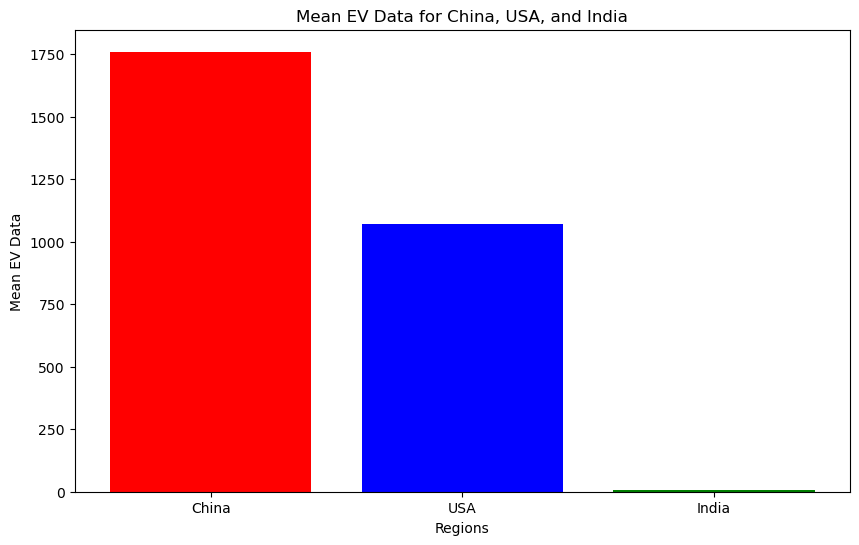

In [46]:
# Extracting mean values for China, USA, and India
regions = ['China', 'USA', 'India']
means = [china_ev_data_mean, us_ev_data_mean, india_ev_data_mean]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(regions, means, color=['red', 'blue', 'green'])
plt.xlabel('Regions')
plt.ylabel('Mean EV Data')
plt.title('Mean EV Data for China, USA, and India')
plt.show()

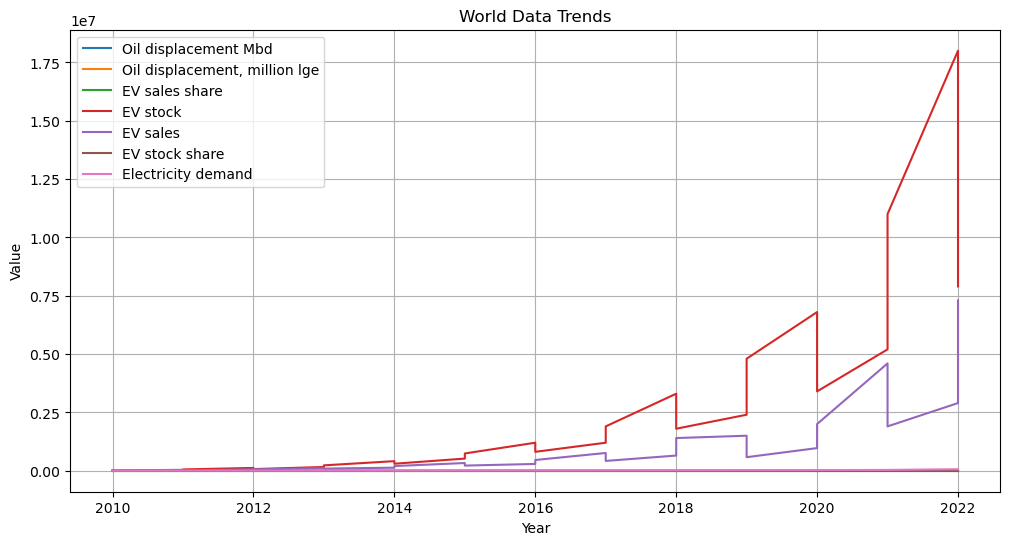

In [47]:
# Filter world data
world_data = df[df['region'] == 'World']

# Plotting the line graph
plt.figure(figsize=(12, 6))
for parameter in world_data['parameter'].unique():
    parameter_data = world_data[world_data['parameter'] == parameter]
    plt.plot(parameter_data['year'], parameter_data['value'], label=parameter)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('World Data Trends')
plt.legend()
plt.grid(True)
plt.show()

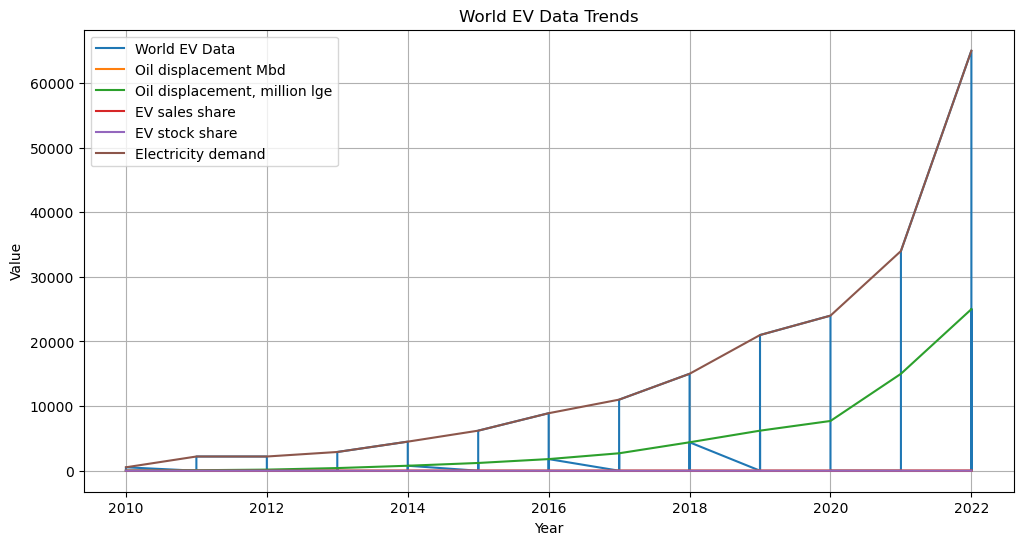

In [48]:
# Plotting the line graph for world EV data
plt.figure(figsize=(12, 6), dpi=100)
world_data = world_data[world_data['powertrain'] == 'EV']
plt.plot(world_data['year'], world_data['value'], label='World EV Data')
world_data = world_data[world_data['powertrain'] == 'EV']
for parameter in world_data['parameter'].unique():
    parameter_data = world_data[world_data['parameter'] == parameter]
    plt.plot(parameter_data['year'], parameter_data['value'], label=parameter)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('World EV Data Trends')
plt.legend()
plt.grid(True)
plt.show()

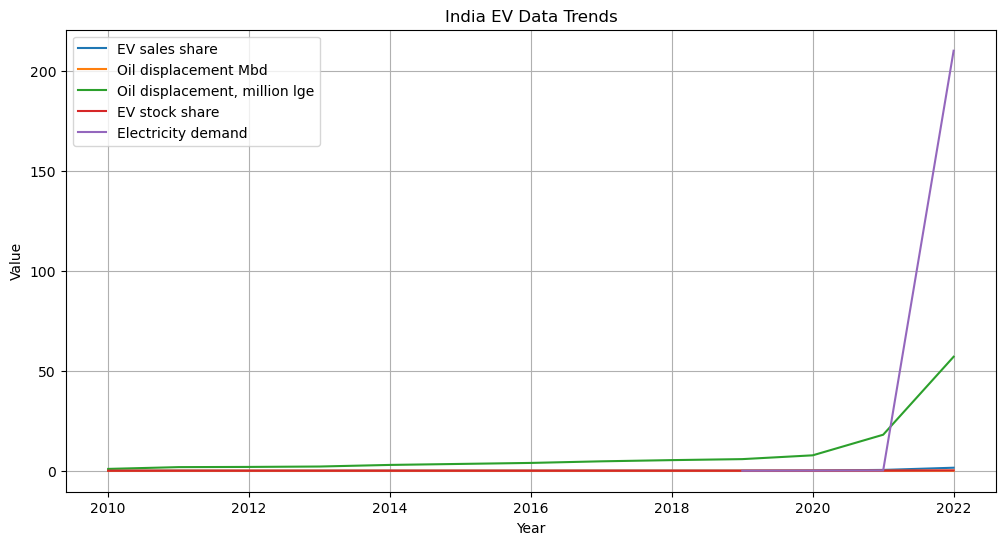

In [49]:
# Plotting the line graph for India EV data
plt.figure(figsize=(12, 6))
for parameter in india_ev_data['parameter'].unique():
    parameter_data = india_ev_data[india_ev_data['parameter'] == parameter]
    plt.plot(parameter_data['year'], parameter_data['value'], label=parameter)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('India EV Data Trends')
plt.legend()
plt.grid(True)
plt.show()

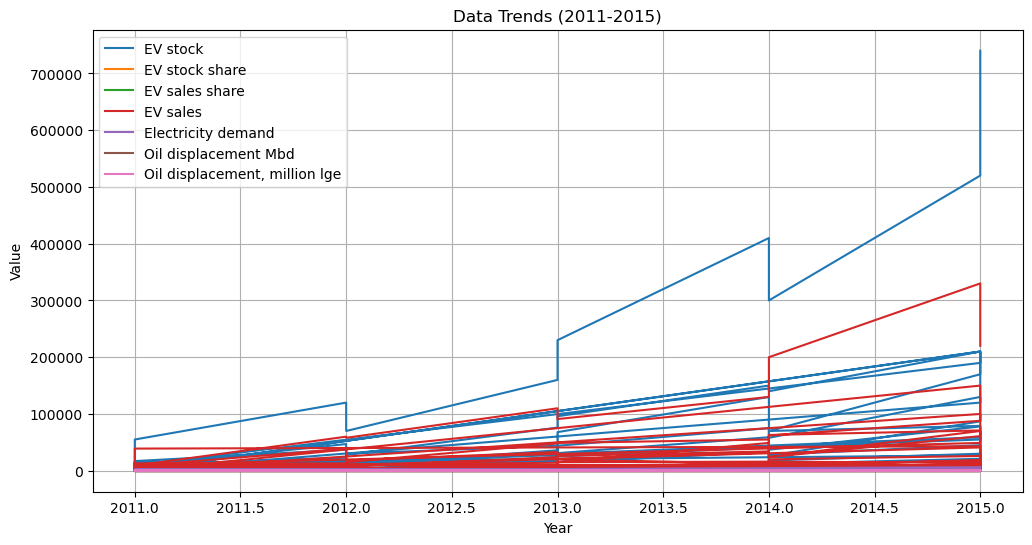

In [ ]:
# Filter data for the years 2011 to 2015 and only EV sales
data_2011_2015 = df[(df['year'] >= 2011) & (df['year'] <= 2015)]

# Filter only EV sales data
data_2011_2015 = data_2011_2015[data_2011_2015['parameter'] == 'EV sales']
plt.figure(figsize=(12, 6))
for parameter in data_2011_2015['parameter'].unique():
    parameter_data = data_2011_2015[data_2011_2015['parameter'] == parameter]
    plt.plot(parameter_data['year'], parameter_data['value'], label=parameter)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Trends (2011-2015)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features (e.g., 'year') and target variable (e.g., 'value') for regression
X = df[['year']]  # Independent variable
y = df['value']   # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Displaying the regression coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Mean Squared Error: 125683024932.2128
R-squared: 0.03834497121818392
Intercept: -56876884.439942375
Coefficient: 28254.190266668393


In [54]:
# Creating a DataFrame for the year 2024
X_2024 = pd.DataFrame({'year': [2024]})

# Predicting the value for 2024
y_2024_pred = model.predict(X_2024)

print(f"Predicted value for 2024: {y_2024_pred[0]}")

Predicted value for 2024: 309596.6597944498


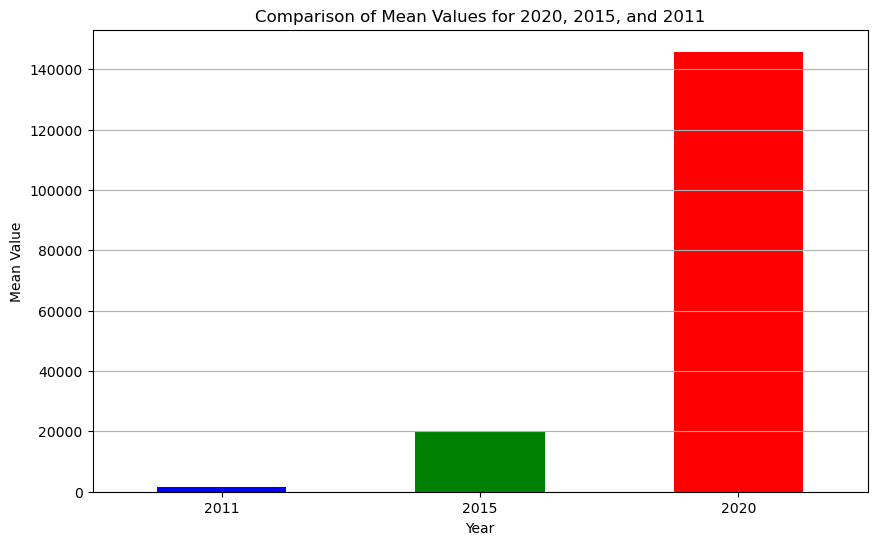

In [57]:
# Filter data for the years 2020, 2015, and 2011
comparison_years = [2020, 2015, 2011]
comparison_data = df[df['year'].isin(comparison_years)]

# Group by year and calculate the mean value for each year
comparison_means = comparison_data.groupby('year')['value'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
comparison_means.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values for 2020, 2015, and 2011')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

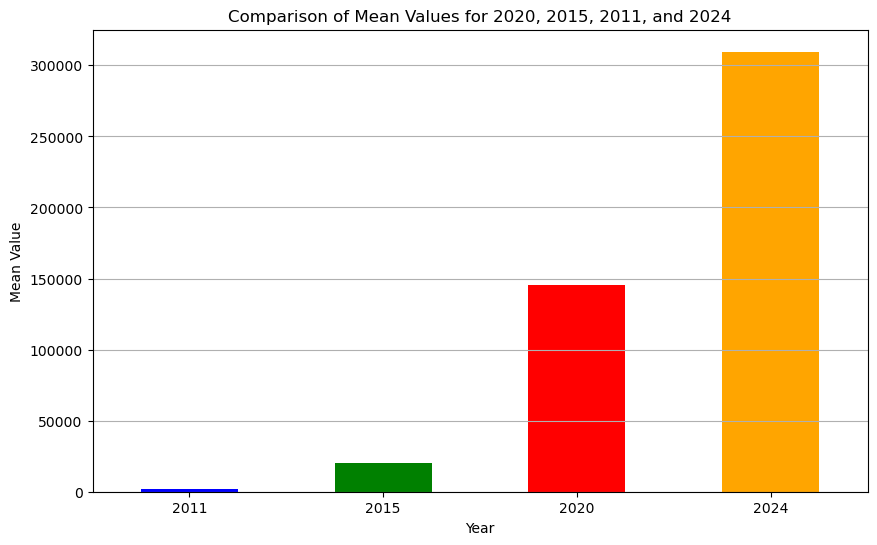

In [59]:
# Adding the predicted value for 2024 to the comparison data
comparison_means_with_2024 = pd.concat([comparison_means, pd.Series(y_2024_pred[0], index=[2024])])

# Plotting the bar chart with 2024 included
plt.figure(figsize=(10, 6))
comparison_means_with_2024.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values for 2020, 2015, 2011, and 2024')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [60]:
# Creating a DataFrame for the years 2026 and 2030
X_future = pd.DataFrame({'year': [2026, 2030]})

# Predicting the values for 2026 and 2030
y_future_pred = model.predict(X_future)

# Displaying the predictions
for year, prediction in zip(X_future['year'], y_future_pred):
    print(f"Predicted value for {year}: {prediction}")

Predicted value for 2026: 366105.0403277874
Predicted value for 2030: 479121.8013944626


In [61]:
# Creating a DataFrame for the years 2024, 2026, 2028, and 2030
india_future_years = pd.DataFrame({'year': [2024, 2026, 2028, 2030]})

# Predicting the values for India
india_future_predictions = model.predict(india_future_years)

# Displaying the predictions
for year, prediction in zip(india_future_years['year'], india_future_predictions):
    print(f"Predicted value for India in {year}: {prediction}")

Predicted value for India in 2024: 309596.6597944498
Predicted value for India in 2026: 366105.0403277874
Predicted value for India in 2028: 422613.420861125
Predicted value for India in 2030: 479121.8013944626


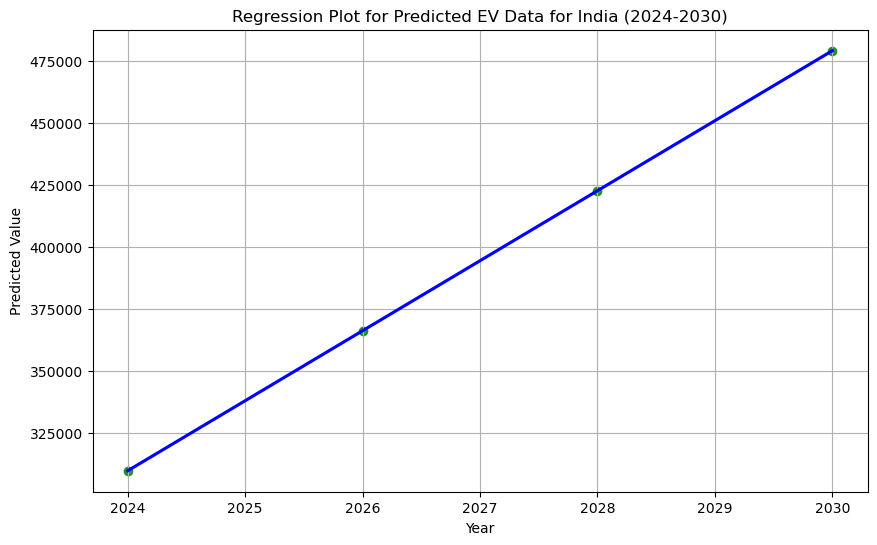

In [68]:

# Creating a DataFrame for plotting
india_predictions_df = pd.DataFrame({
    'year': india_future_years['year'],
    'predicted_value': india_future_predictions
})

# Plotting the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='predicted_value', data=india_predictions_df, marker='o', color='green', line_kws={"color": "blue"})
plt.xlabel('Year')
plt.ylabel('Predicted Value')
plt.title('Regression Plot for Predicted EV Data for India (2024-2030)')
plt.grid(True)
plt.show()
